In [1]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
import scipy
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
from bioinfokit.visuz import cluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
%run -i 'visual_model_selection.py'

import warnings
warnings.filterwarnings("ignore")

# Visual confusion matrices

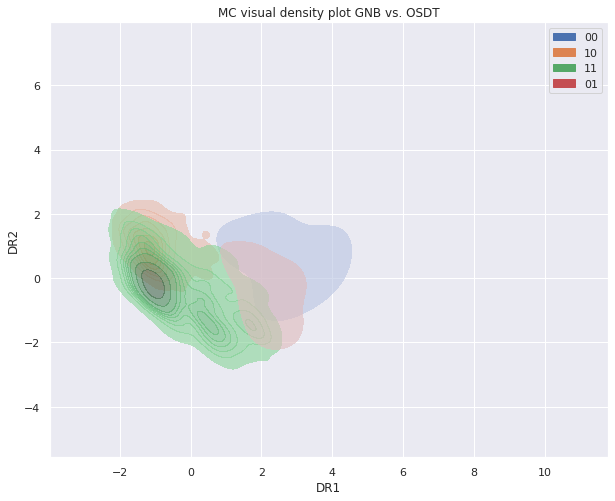

In [3]:
#figure 5 Density VCM plots
df=pd.read_csv('Magic_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Y = df.iloc[:, -16]
Y1='GNB', df['GNB'].to_numpy()
Y2='OSDT', df['OSDT'].to_numpy()
Y_list=[Y1,Y2]

X_st =  StandardScaler().fit_transform(X)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_visual_density_plot(X_DR, Y_list, export_file=False)

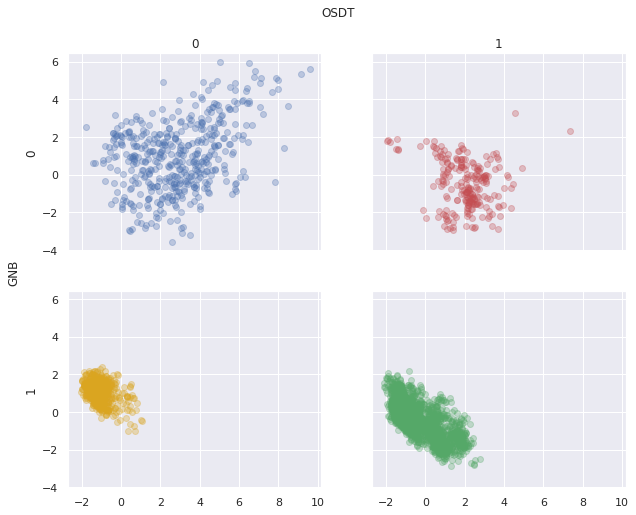

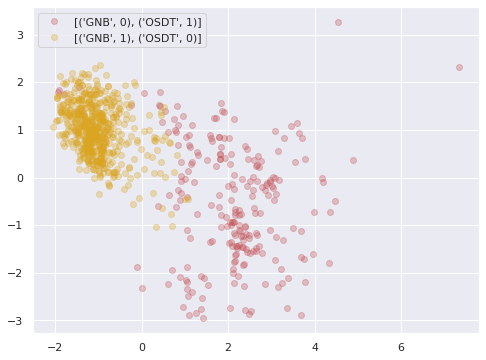

In [4]:
#figure 6 Scatter plots of VCMs
df=pd.read_csv('Magic_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Y = df.iloc[:, -16]
Y1='GNB', df['GNB'].to_numpy()
Y2='OSDT', df['OSDT'].to_numpy()
Y_list=[Y1,Y2]

X_st =  StandardScaler().fit_transform(X)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_visual_confusion_matrix(X_DR, Y_list, export_file=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


MC_biplot GNB vs. OSDT


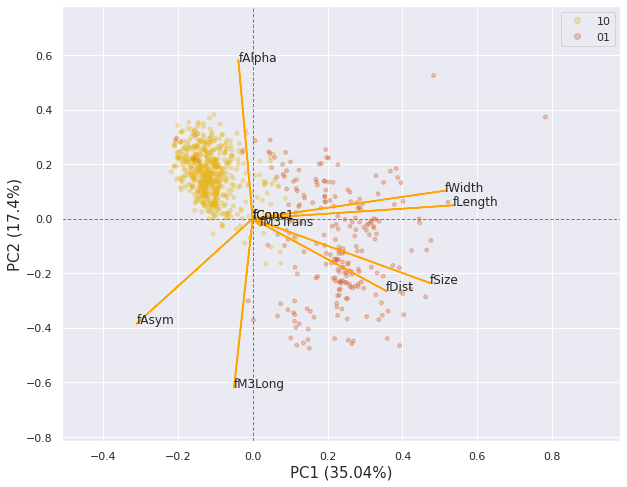

In [5]:
#figure 7 Biplots of VCMs
df=pd.read_csv('Magic_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Y = df.iloc[:, -16]
Y1='GNB', df['GNB'].to_numpy()
Y2='OSDT', df['OSDT'].to_numpy()
Y_list=[Y1,Y2]

features=X.columns.values

X_st =  StandardScaler().fit_transform(X)
pca_model = PCA(n_components=2).fit(X_st) #PCA().fit(X_st)
X_pca = PCA(n_components=2).fit_transform(X_st)

MC_biplot(X_pca, pca_model, Y_list, features, export_file=False)

# Visual comparative matrices

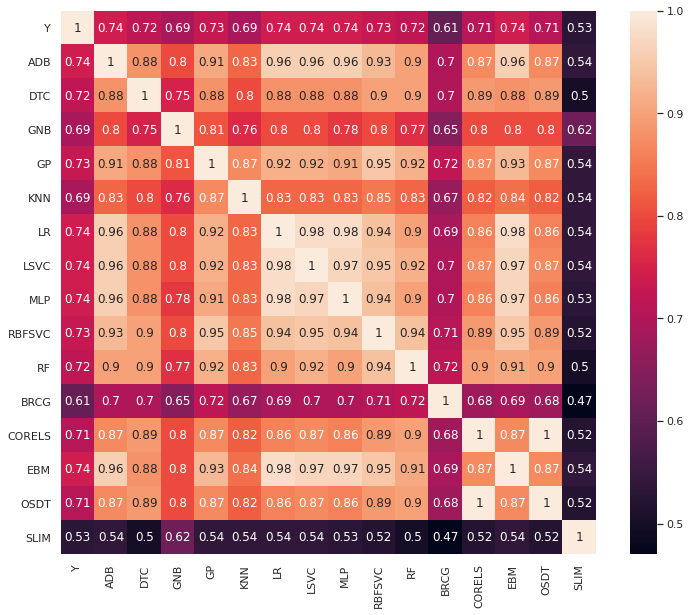

In [6]:
#figure 3 VCX Heatmaps of pairwise agreement
#Ex. Logistic regression has accuracy 0.74 (74% agreement with true label), and agrees with k-nearest neighbors on 83% of their predictions
df=pd.read_csv('FICO_binary_testlabel_and_prediction.csv')

Y_list=[]
for i in range(df.shape[1]):
    Y0=df.columns[i]
    Y1=df[Y0].to_numpy()
    Y=Y0,Y1
    Y_list.append(Y)

MC_heatmap_of_prediction(Y_list, export_file=False)

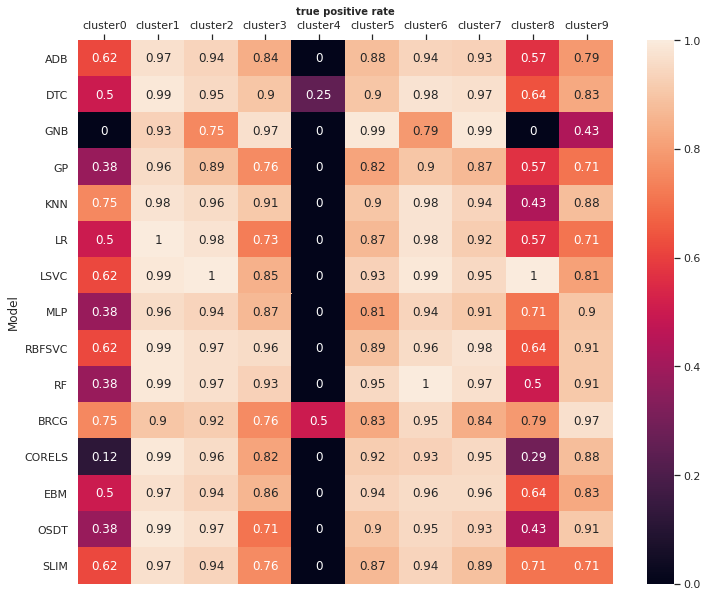

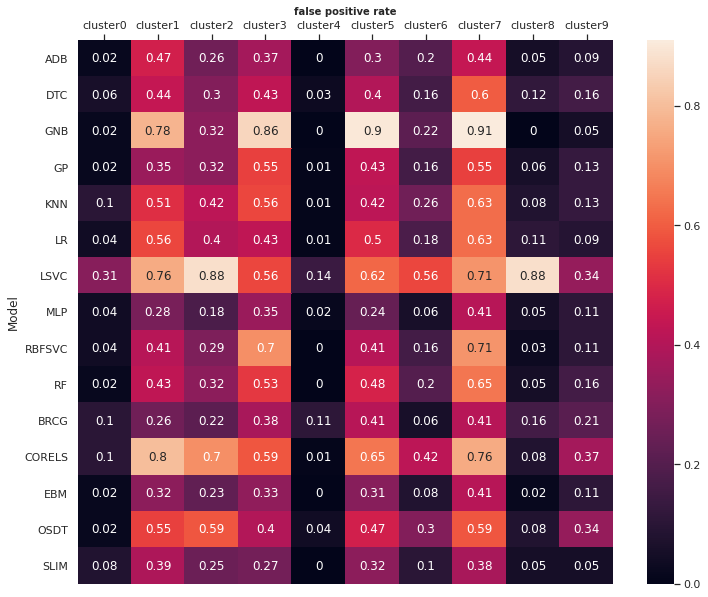

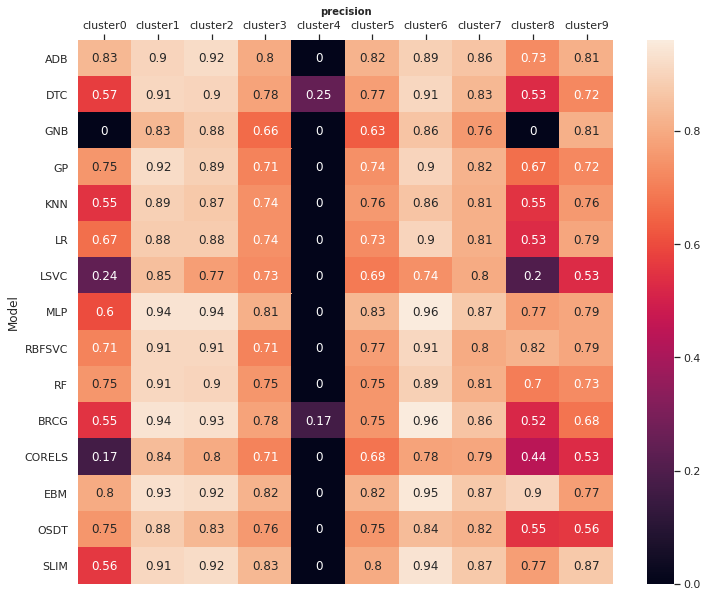

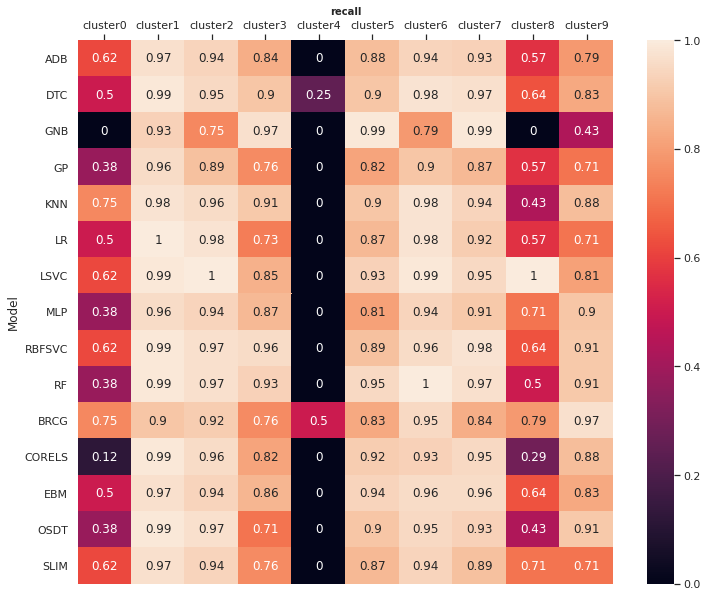

In [7]:
#figure 9 VCX for cluster analysis
df=pd.read_csv('Magic_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Ys = df.iloc[:, -16:]
models=df.iloc[:, -15:].columns.tolist()

Y_list=[]
for i in range(Ys.shape[1]):
    Y0=Ys.columns[i]
    Y1=Ys[Y0].to_numpy()
    Y=Y0, Y1
    Y_list.append(Y)

n_cl=10 #default 10
MC_cluster_analysis(X, Y_list, n_cl=n_cl, export_file=False)

# Visual model landscape

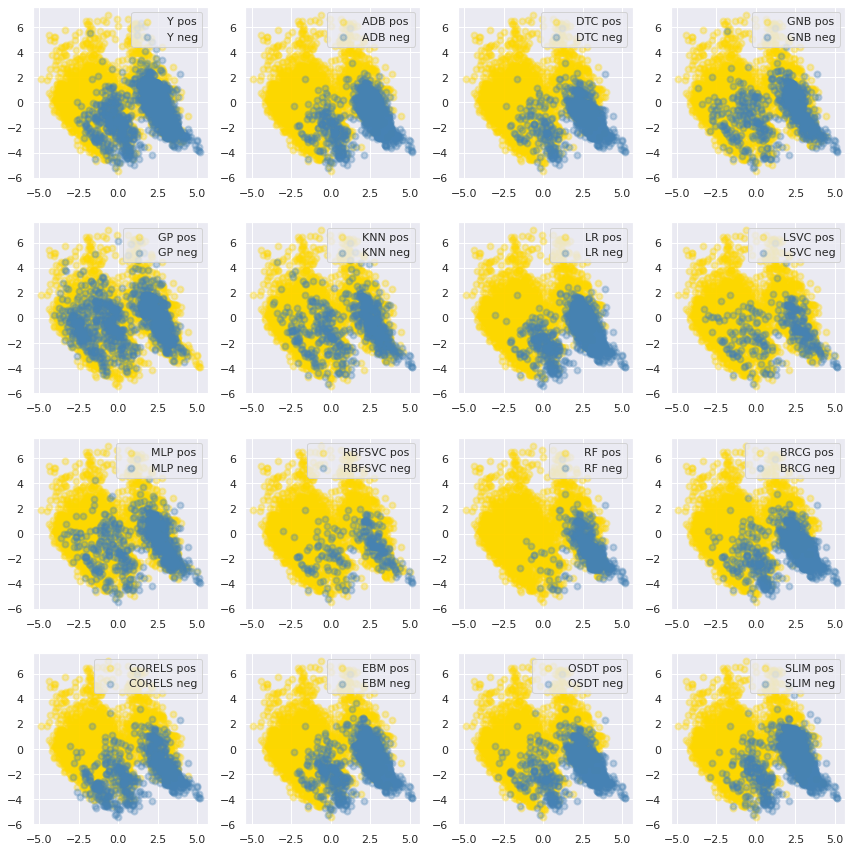

In [8]:
#figure 10 Simple comparison of model predictions using DR
df=pd.read_csv('Adult_testdata_and_prediction.csv')
X = df.iloc[:, :-16]
Ys = df.iloc[:, -16:]

Y_list=[]
for i in range(Ys.shape[1]):
    Y0=Ys.columns[i]
    Y1=Ys[Y0].to_numpy()
    Y=Y0,Y1
    Y_list.append(Y)

X_st =  StandardScaler().fit_transform(X)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_simple_dr_comparison(X_DR, Y_list, export_file=False)

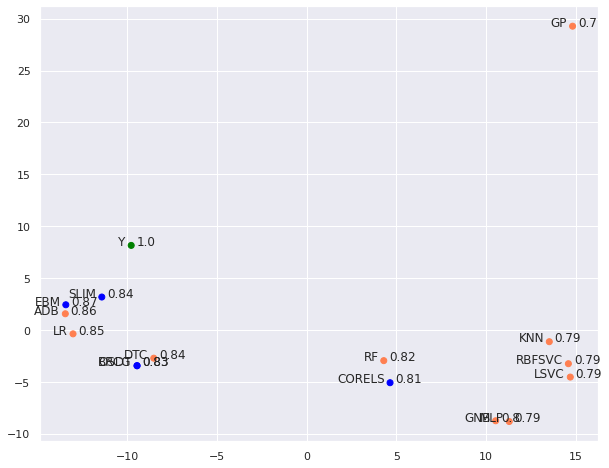

In [9]:
#figure 11 Comparing models of different hypothesis classes
df=pd.read_csv('Adult_testdata_and_prediction.csv')
df = df.iloc[:, -16:]

Y_list=[]
for i in range(df.shape[1]):
        Y0=df.columns[i]
        Y1=df[Y0].to_numpy()
        acc = sum(df.iloc[:,0]==df.iloc[:,i])/(df.shape[0])
        Y=Y0, Y1, round(acc,2)
        Y_list.append(Y)

label = [0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2]
colors = ['green','coral','blue']  

MC_scatterplot_prediction(Y_list, label=label, colors=colors, export_file=False)

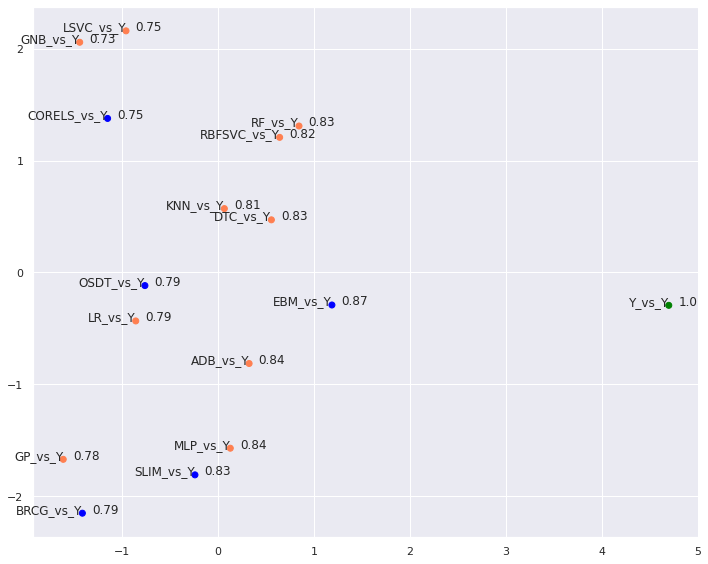

In [10]:
#figure 13 Accelerating computation using confusion matrices
df=pd.read_csv('Magic_testdata_and_prediction.csv')
Ys = df.iloc[:, -16:]

Y_list=[]
for i in range(Ys.shape[1]):
    Y0=Ys.columns[i]
    Y1=Ys[Y0].to_numpy()
    acc = sum(Ys.iloc[:,0]==Ys.iloc[:,i])/(Ys.shape[0])
    Y=Y0, Y1, round(acc,2)
    Y_list.append(Y)

label = [0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2]
colors = ['green','coral','blue']  

MC_scatterplot_confusion(Y_list, label=label, colors=colors, export_file=False)

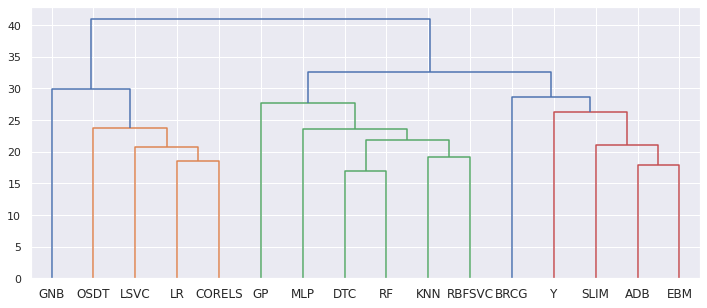

In [11]:
#figure 14 VML dendrograms
df=pd.read_csv('Magic_testdata_and_prediction.csv')
Ys = df.iloc[:, -16:]

Y_list=[]
for i in range(Ys.shape[1]):
    Y0=Ys.columns[i]
    Y1=Ys[Y0].to_numpy()
    acc = sum(Ys.iloc[:,0]==Ys.iloc[:,i])/(Ys.shape[0])
    Y=Y0, Y1, round(acc,2)
    Y_list.append(Y)

MC_hierarchical_tree(Y_list, export_file=False)